# Introduction

The goal of this data is to analyze biodiversity data from the National Park Service, especially the various species, the numbers observed at different national parks.

This project will scope, analyze, prepare, plot data and seek to explain the findings from the analysis

A few questions this project seeks to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- What animal is most prevelent and what is their distribution amongst parks?

**Data sources:**

Both `observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to establish the scope of the project at the beginning. The following four sections are to help guide the process and progress. The first will set the high level objectives and intentions. In the next data section we have to look at the data to establish if we can reach the goals of the project. Thirdly, we have to review the methods and questions and if they are aligned with the project goals. Lastly, we have to draw conclusions and describe findings.

### Project Goals

The perspective is a biodiversity analyst for the National Park Service. The National Parks Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity in their parks. Therefore, the main objective as a data analyst will be to understand the characteristics of species and their conservation status, and those species and their relationsship to the national park. Some questions to pose:

- What is the distribution of conservation status for species?
- Are there certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- What animal is most prevelent and what is their distribution amongst parks?

### Data

This project had two datasets provided. One `csv` with the species, their category, scientific name, common name and conservation status; The other with the number of individuals observed by scientific name and the National Park where they were observed. This data will be used to analyse the goals of this project.

### Analysis

In this section, descriptive statistics and data visulization techniques will be employed to understand the data better. Statistical inference will also be used to see if the observed values are statistically significant. Some of the key metrics that will be computed include:

1. Distributions
2. Counts
3. Relationships between species
4. Conservation status of species
5. Observations of species in parks

### Evaluation

Lastly it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered. This section will also reflect on what has been learned in the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done with different methodologies.

1. Get a glimpse at the csv files consider possible cleanups and filling of missing data
2. Import csv
3. Look more in detail what there is to clean up and what there might be to discover
4. Clean-Up
5. Discovery, visulization and explanation

1. Possible merge on scientific_name; either by adding the total number found and areas to species or by adding the category and describition to observations.
In the first case there would be data lost, in the second there wouldn't. Therefore we are going with the second option at first.
- outer merge on observations with species

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import seaborn as sns

observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

print(observations.describe(include = "all"))
print(species.describe(include = "all"))

# print(species.conservation_status.unique())
# print(species.category.value_counts())

cons_species = species.dropna(subset="conservation_status")
cons_species = cons_species.pivot_table(columns = "category", index = "conservation_status", values = "scientific_name", aggfunc = "count")
cons_species = cons_species.fillna(value=0)
print(cons_species)

         scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                  NaN      9.000000
25%                  NaN                                  NaN     86.000000
50%                  NaN                                  NaN    124.000000
75%                  NaN                                  NaN    195.000000
max                  NaN                                  NaN    321.000000
              category    scientific_name        common_names  \
count             5824 

2. Create a stacked bar chart with the conservations status on the x axis and the number of individuals by category on the y axis.

conservation_status
Endangered             1.0
In Recovery            0.0
Species of Concern    43.0
Threatened             2.0
Name: Vascular Plant, dtype: float64


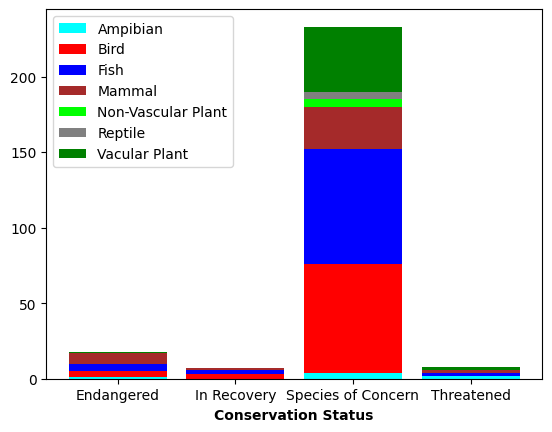

<Figure size 640x480 with 0 Axes>

In [80]:
# Values of each group
amphibians = cons_species.Amphibian
birds = cons_species.Bird
fish = cons_species.Fish
mammals = cons_species.Mammal
nonvascular_plant = cons_species["Nonvascular Plant"]
reptiles = cons_species.Reptile
vascular_plant = cons_species["Vascular Plant"]
print(vascular_plant)

# Heights for bars
b_2 = np.add(amphibians, birds)
b_3 = np.add(b_2, fish)
b_4 = np.add(b_3, mammals)
b_5 = np.add(b_4, nonvascular_plant)
b_6 = np.add(b_5, reptiles)

# Position of bars on the x axis
r = [0, 1.2, 2.4, 3.6]

# Names of group and bar width
conservation_status = ["Endangered", "In Recovery", "Species of Concern", "Threatened"]
barWidth = 1

# Create amphibian bars
plt.bar(r, amphibians, color = "aqua", width = barWidth)
# Create bird bars
plt.bar(r, birds, bottom = amphibians, color = "red", width = barWidth)
# Create fish bars
plt.bar(r, fish, bottom = b_2, color = "blue", width = barWidth)
# Create mammal bars
plt.bar(r, mammals, bottom = b_3, color = "brown", width = barWidth)
# Create nonvascular plant bars
plt.bar(r, nonvascular_plant, bottom = b_4, color = "lime", width = barWidth)
# Create reptiles bars
plt.bar(r, reptiles, bottom = b_5, color = "gray", width = barWidth)
# Create vascular plant bars
plt.bar(r, vascular_plant, bottom = b_6, color = "green", width = barWidth)

# Custom x axis
plt.xticks(r, conservation_status)
plt.xlabel("Conservation Status", fontweight = "bold")
plt.legend(["Ampibian", "Bird", "Fish", "Mammal", "Non-Vascular Plant", "Reptile", "Vacular Plant"])

plt.show()
plt.clf()

As we can see, most of the species in our dataset have the conservation satus of "Species of Concern" with the next largest being "Endangered".
The majority of species in the "Species of Concern" category are Fish, Birds, Vascular Plants and Mammals.

3. Pivot the first table by the scientific name and the total amount they were seen in each park then connect it with the second dataset to add the common names. One-Hot Encode Park Names

In [97]:
observations2 = pd.get_dummies(data = observations, prefix = "", prefix_sep = "", columns = ["park_name"])
observations2 = observations2.groupby("scientific_name", as_index = False).sum()
# print(observations2.head())
# print(observations2.describe())
observations_most = observations2.observations.max()
print(observations_most)

1785


We found out that we saw every species within this dataset within every one of the national parks at least once and a maximum of three times.